# XGBoost sample efficiency

In [ ]:
# Running this notebook requires the xgboost package. Uncomment the following line to install it.
#!pip install xgboost

In [1]:
import ipwgml
from ipwgml.data import download_dataset
import hdf5plugin
import xarray as xr

files = download_dataset("spr", "gmi", "gmi", "training", "on_swath", "tabular")
input_data = xr.load_dataset(files["gmi"][0], engine="h5netcdf")
target_data = xr.load_dataset(files["target"][0], engine="h5netcdf")

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = input_data.observations.data
y = target_data.surface_precip.data

In [3]:
from ipwgml.evaluation import Evaluator
                            

def run_retrieval(input_data):
    input_data = input_data.transpose("batch", "channels_gmi")
    obs = input_data.obs_gmi.data
    surface_precip = rf_regressor.predict(obs)
    return xr.Dataset({
        "surface_precip": (("samples",), surface_precip)
    })


In [6]:
pip install xgboost

  Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
from xgboost import XGBRegressor
n_samples = x.shape[0]

sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
results = []
n_repeats = 5

for size in sizes:
    results.append([])
    for repeat in range(n_repeats):
        x_train, _, y_train, _ = train_test_split(
            x, y, train_size=size, test_size=1.0 - size
        )
        rf_regressor = XGBRegressor(n_estimators=1_000, max_depth=10, random_state=2, n_jobs=16)
        rf_regressor.fit(x_train, y_train)
    
        evaluator = Evaluator(
            reference_sensor="gmi",
            geometry="on_swath",
            retrieval_input=["gmi"],
        )
        evaluator.evaluate(run_retrieval, input_data_format="tabular", batch_size=4096)
        results[-1].append(evaluator.get_results())
    results[-1] = xr.concat(results[-1], dim="repeats")
    


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


In [9]:
results.size

<xarray.DataArray 'size' (size: 6)> Size: 48B
array([0, 1, 2, 3, 4, 5])
Dimensions without coordinates: size

In [8]:
results = xr.concat(results, dim="size")
results.to_netcdf("xgboost_sample_efficiency.nc")

In [16]:
results_nn = xr.load_dataset("neural_network_sample_efficiency.nc")

In [ ]:
results

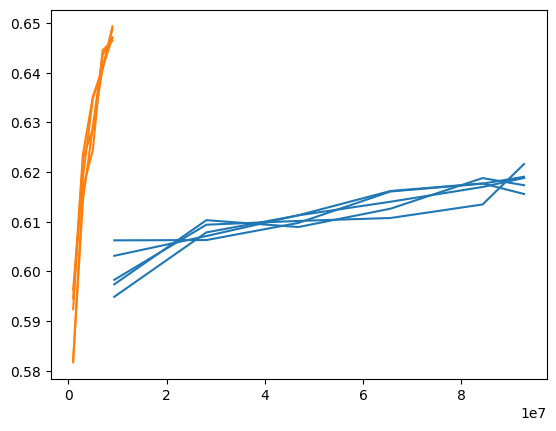

In [19]:
import matplotlib.pyplot as plt
import numpy as np
results["size"] = (("size",), np.array(sizes) * input_data.samples.size)
plt.plot(results["size"], results.correlation_coef, color="C0")
plt.plot(results_nn["size"], results_nn.correlation_coef, color="C1")



In [20]:
import matplotlib.pyplot as plt
plt.plot(results.correlation_coef)

AttributeError: 'list' object has no attribute 'correlation_coef'

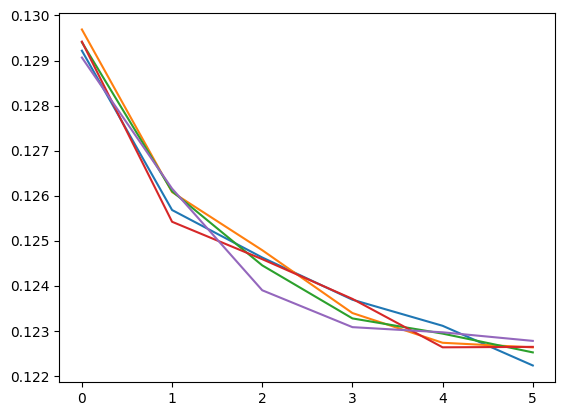

In [10]:
import matplotlib.pyplot as plt
plt.plot(results.mae)

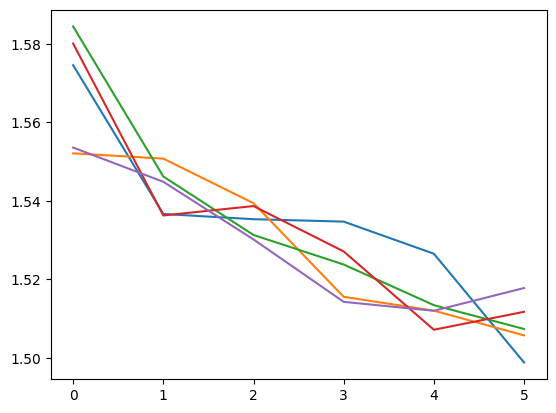

In [11]:
import matplotlib.pyplot as plt
plt.plot(results.mse)

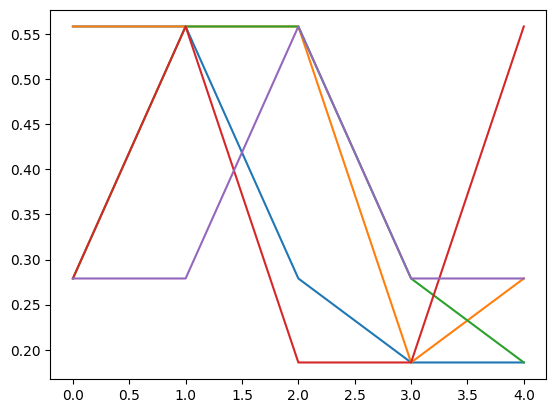

In [13]:
import matplotlib.pyplot as plt
plt.plot(results.effective_resolution)